In [66]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x_data = pd.read_csv('G:/iris_data.csv')

In [68]:
print(x_data.shape) # no. of instances of the data and no. of attributes each data contain.

(149, 5)


In [69]:
x_data.head() # this displays first few points in data so as to observe the behaviour data for further usages.

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [70]:
print(type(x_data))  


<class 'pandas.core.frame.DataFrame'>


In [71]:
x=x_data.values

In [72]:
print(type(x))
print(type(x[0][4]))

<class 'numpy.ndarray'>
<class 'str'>


In [73]:
print(x.shape)

(149, 5)


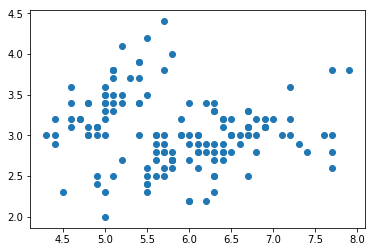

In [74]:
plt.scatter(x[:,0],x[:,1])

1


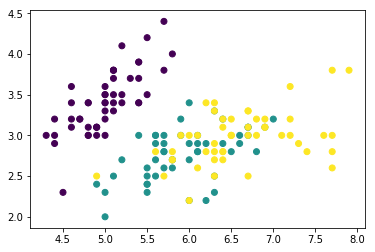

In [75]:
for i in range(149):
    if x[i][4]=="Iris-setosa":
        x[i][4]=1
    elif x[i][4]=="Iris-versicolor":
        x[i][4]=2
    else:  # this is for "Iris-virginica"
        x[i][4]=3
    
print(x[23][4])



plt.scatter(x[:,0],x[:,1],c=x[:,4]) # return the graph n the form of object
plt.show() # used to show the graph in presentable format

In [76]:
# sorting the data-set using the column having maximum range among all the columns , it is valid for multidimensional dataset.
max_range_col_index=0
max_range_of_col=max(x[:,0])-min(x[:,0])
no_of_col = x.shape[1]

for col in range(1,no_of_col):
    range_of_col=max(x[:,col])-min(x[:,col])
    if range_of_col>max_range_of_col:
        max_range_of_col=range_of_col
        max_range_col_index=col
        

    
        
        
        

In [77]:
print(type(x))
x=sorted(x,key=lambda z:z[max_range_col_index])
print(type(x))
x=np.array(x)
print(type(x))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [78]:
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [79]:
k, gapdf = optimalK(x, nrefs=5, maxClusters=5)
print(k)

4


In [80]:
print(type(x))
centers=[]
n=x.shape[0]

for i in range(n//2-k//2,n//2+k//2):
    centers.append(x[i]);
    

<class 'numpy.ndarray'>


In [89]:
print(centers) # coordinates  of the assigned centroid.

[array([6.4, 2.9, 4.3, 1.3, 2], dtype=object), array([6.2, 2.9, 4.3, 1.3, 2], dtype=object), array([6.7, 3.1, 4.4, 1.4, 2], dtype=object), array([6.6, 3.0, 4.4, 1.4, 2], dtype=object)]


In [90]:
color=['green','red','blue','yellow','orange']

clusters={}

for i in range(k):
    #center = 10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    
    cluster={
         'center':centers[i],
         'points' :points,
         'colour':color[i]
        
    }
    
    clusters[i]=cluster
    
clusters

{0: {'center': array([6.4, 2.9, 4.3, 1.3, 2], dtype=object),
  'points': [],
  'colour': 'green'},
 1: {'center': array([6.2, 2.9, 4.3, 1.3, 2], dtype=object),
  'points': [],
  'colour': 'red'},
 2: {'center': array([6.7, 3.1, 4.4, 1.4, 2], dtype=object),
  'points': [],
  'colour': 'blue'},
 3: {'center': array([6.6, 3.0, 4.4, 1.4, 2], dtype=object),
  'points': [],
  'colour': 'yellow'}}

In [91]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [92]:
# assigning points to clusters(E-step of expectation maximization problem)
# K-Means is the special case of expectation maximization problem
def assign_points_to_clusters(clusters):
    # iterating in every cluster
    for i in range(x.shape[0]):
        dist_of_this_point_from_every_cluster_center = []
        current_point=x[i]
    
    # now iterating in every cluster
        for kx in range(k):
            distance_from_center=distance(current_point,clusters[kx]['center'])
            dist_of_this_point_from_every_cluster_center.append(distance_from_center)
        
        current_cluster=np.argmin(dist_of_this_point_from_every_cluster_center)
        clusters[current_cluster]['points'].append(current_point)
        #print(clusters[current_cluster]['points'])

        
    
    

In [96]:
assign_points_to_clusters(clusters)
print(x.shape[0])

149


In [97]:
def updateClusters(clusters):   # M-step -> we update every cluster center acording to mean of the cluster
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]



def plotclusters(clusters):
    
    for kx in range(k):
        #print(type(clusters[kx]['points']))
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,1],pts[:,2],color=clusters[kx]['colour'])
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[1],uk[2],color='black',marker="*")
    

    

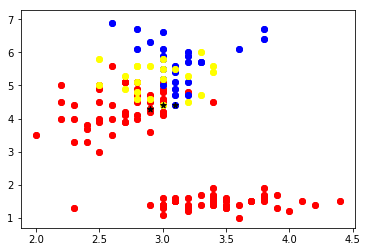

In [98]:
plotclusters(clusters)

Time:  0.1889360505173272


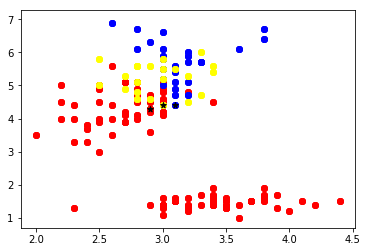

In [99]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.1107516924457741


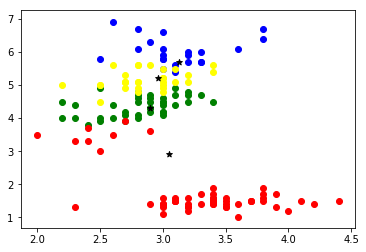

In [100]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.13124000493030508


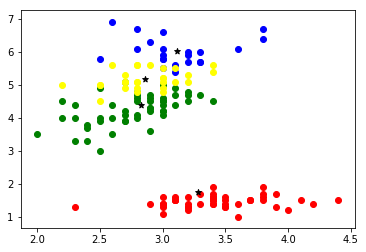

In [101]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.10011820256261217


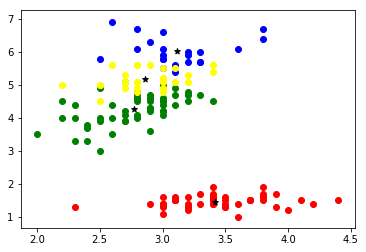

In [102]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.11092117406121815


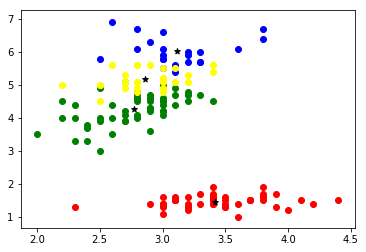

In [103]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.11114872979646861


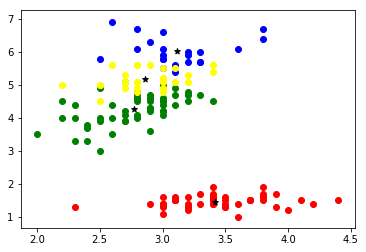

In [104]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.11044314899208985


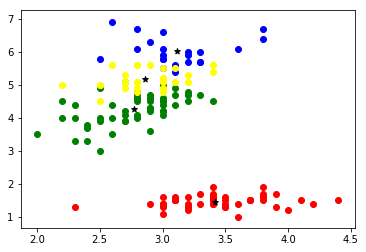

In [105]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.10651149156467454


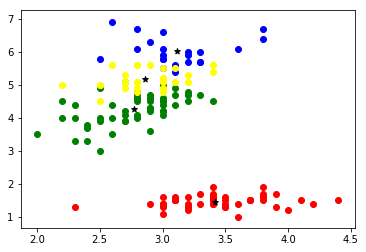

In [106]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.1060504541633236


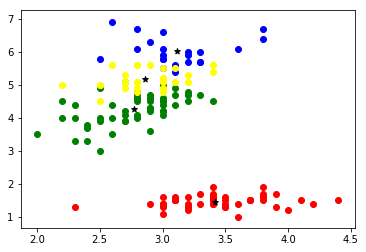

In [107]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.19866524338988256


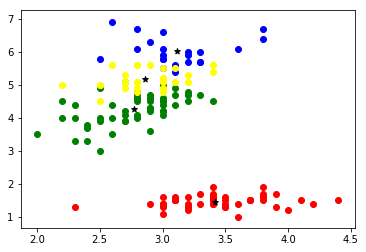

In [108]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.11348196620792805


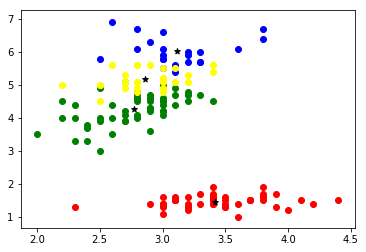

In [109]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.1581168656725822


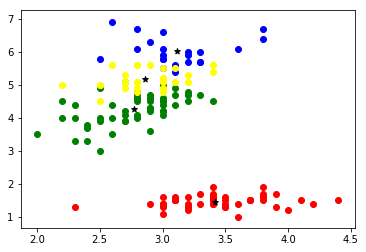

In [110]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.09357676529521086


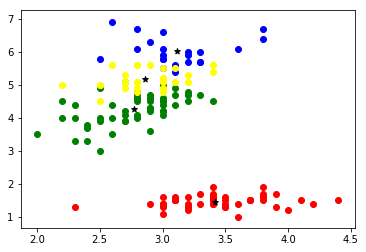

In [111]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  